## HR Data Visuaization.

1. <a href="#import">Import Necessary Libraries </a>
2. <a href="#read">Read DataFrame</a>
3. <a href="#describe">Describe Information Of The Data</a>
4. Clean Up The Data
<ul>
    <li><a href="#drop">Drop Rows NAN</a></li>
    <li><a href="#reset">Reset New Index</a></li>
    <li><a href="#del_spaces">Delete Spaces From Department Column</a></li>
    <li><a href="#correct_type">Convert Columns To Correct Type</a></li>
    <li><a href="#add_age">Add Age Column</a></li>
</ul>
5. Start With Questions
<ul>
    <li>
        <a href="#q1">
            B.1 Is there any relationship between who a person works for and their performance score?
        </a>
    </li>
    <li>
        <a href="#q2">
            B.2 What is the overall diversity profile of the organization?
        </a>
    </li>
    <li>
        <a href="#q3">
            B.3 What are our best recruiting sources if we want to ensure a diverse organization?
        </a>
    </li>
    <li>
        <a href="#q4">
            B.4 Can we predict who is going to terminate and who isn't? What level of accuracy can we achieve on this?
        </a>
    </li>
    <li>
        <a href="#q5">
            B.5 Are there areas of the company where pay is not equitable?
        </a>
    </li>
    <li>
        <a href="#q6">
             B.6 Is there a relationship between age and performance
        </a>
    </li>
    <li>
        <a href="#q7">
            B.7 Does working on special projects affects performance
        </a>
    </li>


### 1 : Import Necessary Libraries <span id="import"></span>

In [1]:
import numpy as np 
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from datetime import date

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/human-resources-data-set/HRDataset_v14.csv


### 2 : Read DataFrame <span id="read"></span>

In [2]:
hr_file_path = '../input/human-resources-data-set/HRDataset_v14.csv'
hr_data = pd.read_csv(hr_file_path)
hr_data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


### Describe information of the data <span id="describe"></span>

In [3]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [4]:
hr_data.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

### 3 : Clean Up The Data <span id="clean"></span>

##### Drop Rows NAN <span id="drop"></span>

In [5]:
# drop column has alot of nan values
hr_data = hr_data.drop(columns=['DateofTermination'])
hr_data = hr_data.dropna()

#### Reset New Index <span id="reset"></span>

In [6]:
hr_data = hr_data.reset_index()
hr_data = hr_data.drop(columns = 'index')

#### Delete Spaces From Department Column <span id="del_spaces"></span>

In [7]:
hr_data['Department'] = hr_data['Department'].str.strip()

#### Convert Columns To Correct Type <span id="correct_type"></span>

In [8]:
# Convert date columns to real date.
hr_data['LastPerformanceReview_Date'] = pd.to_datetime(hr_data['LastPerformanceReview_Date']) 
hr_data['DOB'] = pd.to_datetime(hr_data['DOB']) 
hr_data['DateofHire'] = pd.to_datetime(hr_data['DateofHire']) 

#### Add Age Column <span id="add_age"></span>

In [9]:
current_year = date.today().year
hr_data['Age'] = abs(current_year - pd.DatetimeIndex(hr_data['DOB']).year)

# Start With Questions <span id="q_all"></span>

## B.1 Is there any relationship between who a person works for and their performance score? <span id="q1"></span>

In [10]:
# grouped_data
# get only (ManagerName,PerformanceScore) columns 
grouped_data = hr_data.groupby(['ManagerName','PerformanceScore']).size().reset_index()

# Add Count column to values
grouped_data.columns = ['ManagerName','PerformanceScore','Count']

# Arrange the values from largest to smallest
grouped_data = grouped_data.sort_values('Count', ascending = False)

# print bar to display data
px.bar(grouped_data, 
       x = 'ManagerName', 
       y = 'Count', 
       color='PerformanceScore', 
       title = 'Performance Score of Employee & The Managers')

##### As shown in the data above, the name of the manager is displayed and each manager has a number of employees who work based on the employee's performance

1. After printing the data, we noticed that all managers have <strong>50%</strong> of the employees <strong>Fully Meets</strong>
2. (Brian Champaigne, Brandon R. LeBlanc, Board of Directors) These managers out of 21 managers have only <strong>Fully Meets</strong>
3. Brannon Mille Has a large number of employees with <strong>Exceeds</strong>
4. (Eric Dougal, Simon Roup)These managers out of 20 managers have only  <strong>Exceeds</strong> and <strong>Fully Meets</strong>
5. 7 out of 21 Managers are having <strong>PIP</strong> to over their employee, and the highest of them is <strong>Brannon Mille</strong>
6. 13 out of 21 Managers are having <strong>Needs Development</strong> to over their employee, and the highest of them is <strong>Michael Albert</strong>

## B.2 What is the overall diversity profile of the organization? <span id="q2"></span>

##### B2.A. Diversity profile of the organization based on <strong>Sex, Citizen, Race</strong>

B2.A.1. Diversity profile of the organization based on <strong>Sex</strong>

<AxesSubplot:xlabel='Sex', ylabel='count'>

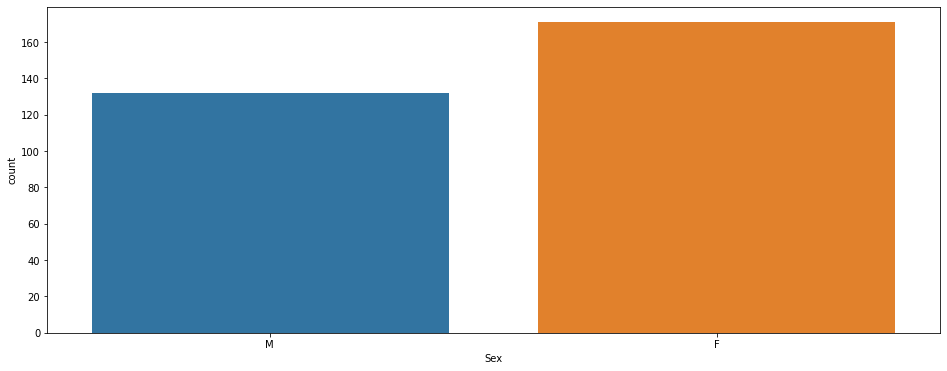

In [11]:
plt.figure(figsize=(16,6))
sns.countplot(x = "Sex", data=hr_data)

B2.A.2. Diversity profile of the organization based on <strong>Citizen</strong>


<AxesSubplot:xlabel='CitizenDesc', ylabel='count'>

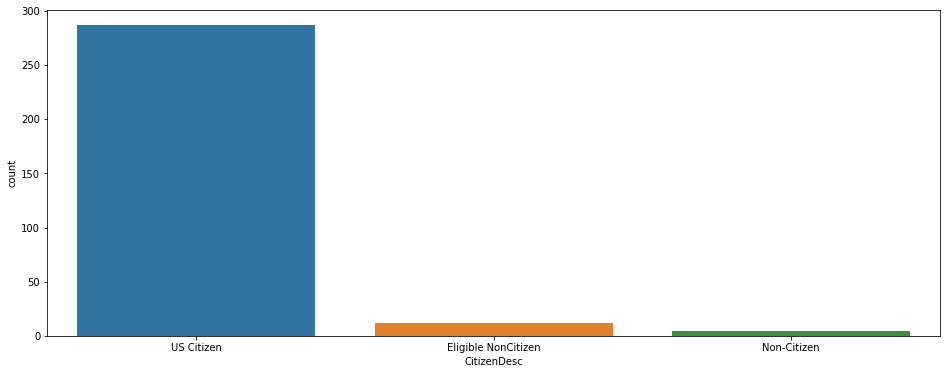

In [12]:
plt.figure(figsize=(16,6))
sns.countplot(x = "CitizenDesc", data=hr_data)

B2.A.3. Diversity profile of the organization based on <strong>Race Description</strong>

<AxesSubplot:xlabel='RaceDesc', ylabel='count'>

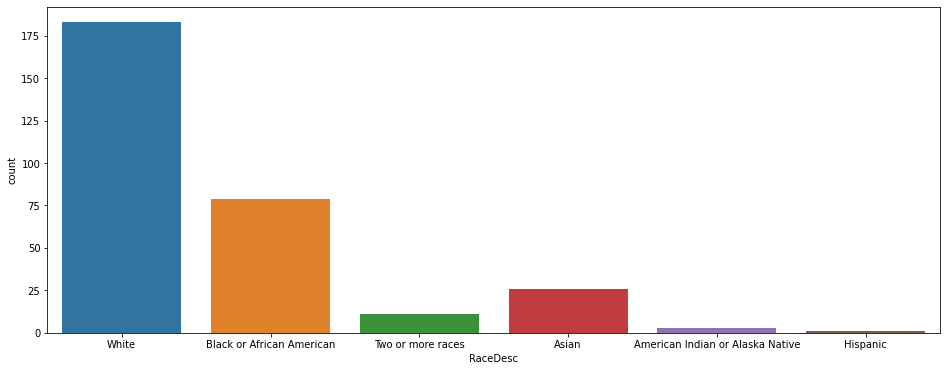

In [13]:
plt.figure(figsize=(16,6))
sns.countplot(x = "RaceDesc", data=hr_data)

##### Sammary of  Diversity profile of the organization.
1. Here we see that the company's diversity is based on gender, we see that the number of females<strong> exceeds the number of males, with approximately 30 employees</strong>
2. Most of the employees are <strong>US citizens</strong> 
3. Most of the employees are <strong>white </strong>and the main reason is that they are American citizens, and nearly half of the employees are<strong> black or Americans</strong>


#### B2.B. Diversity based on Department

B2.B.1. Diversity based on <strong>Sex and Department</strong>

In [14]:
# grouped_data
# get only (Sex,Department) columns 
grouped_data = hr_data.groupby(['Sex','Department']).size().reset_index()

# Add Count column to values
grouped_data.columns = ['Sex','Department','Count']

# Arrange the values from largest to smallest
grouped_data = grouped_data.sort_values('Count', ascending = False)

# print bar to display data
px.bar(grouped_data, 
       x = 'Department', 
       y = 'Count', 
       color='Sex', 
       title = 'Numbers of Sex accross Department')


B2.B.2. Diversity based on <strong>Race and Department</strong>


In [15]:
# grouped_data
# get only (RaceDesc,Department) columns 
grouped_data = hr_data.groupby(['RaceDesc','Department']).size().reset_index()

# Add Count column to values
grouped_data.columns = ['RaceDesc','Department','Count']

# Arrange the values from largest to smallest
grouped_data = grouped_data.sort_values('Count', ascending = False)

# print bar to display data
px.bar(grouped_data, 
       x = 'Department', 
       y = 'Count', 
       color='RaceDesc', 
       title = 'Numbers of Race accross Department')

B2.B.3. Diversity based on <strong>Citizen and Department</strong>

In [16]:
# grouped_data
# get only (CitizenDesc,Department) columns 
grouped_data = hr_data.groupby(['CitizenDesc','Department']).size().reset_index()

# Add Count column to values
grouped_data.columns = ['CitizenDesc','Department','Count']

# Arrange the values from largest to smallest
grouped_data = grouped_data.sort_values('Count', ascending = False)

# print bar to display data
px.bar(grouped_data, 
       x = 'Department', 
       y = 'Count', 
       color='CitizenDesc', 
       title = 'Numbers of Citizen accross Department')

### Sammary of Diversity based on Department
1. After the result of gender, depending on the departments, we found that in the <strong>Production</strong>  department, the number of women is more than the number of men and vice versa in the <strong>IT/IS</strong> department.
2. The most <strong>Race</strong> is found in the production section <strong>Production</strong>, and all departments have <strong>white</strong> employees
3. All departments have citizens of America, and the department that has the most diversity of citizenship is the <strong>production</strong> department, and the departments that have American citizens only are the<strong> Admin Offices and Executive Office</strong>


#### B2.C. Diversity based on Position

B2.C.1. Diversity based on <strong>Sex and Position</strong>

In [17]:
# grouped_data
# get only (Sex,Position) columns 
grouped_data = hr_data.groupby(['Sex','Position']).size().reset_index()

# Add Count column to values
grouped_data.columns = ['Sex','Position','Count']

# Arrange the values from largest to smallest
grouped_data = grouped_data.sort_values('Count', ascending = False)

# print bar to display data
px.bar(grouped_data, 
       x = 'Position', 
       y = 'Count', 
       color='Sex', 
       title = 'Numbers of Sex accross Position')

B2.C.2. Diversity based on <strong>Citizen and Position</strong>


In [18]:
# grouped_data
# get only (CitizenDesc,Position) columns 
grouped_data = hr_data.groupby(['CitizenDesc','Position']).size().reset_index()

# Add Count column to values
grouped_data.columns = ['CitizenDesc','Position','Count']

# Arrange the values from largest to smallest
grouped_data = grouped_data.sort_values('Count', ascending = False)

# print bar to display data
px.bar(grouped_data, 
       x = 'Position', 
       y = 'Count', 
       color='CitizenDesc', 
       title = 'Numbers of Citizen accross Position')

B2.C.3. Diversity based on <strong>Race and Position</strong>


In [19]:
# grouped_data
# get only (RaceDesc,Department) columns 
grouped_data = hr_data.groupby(['RaceDesc','Position']).size().reset_index()

# Add Count column to values
grouped_data.columns = ['RaceDesc','Position','Count']

# Arrange the values from largest to smallest
grouped_data = grouped_data.sort_values('Count', ascending = False)

# print bar to display data
px.bar(grouped_data, 
       x = 'Position', 
       y = 'Count', 
       color='RaceDesc', 
       title = 'Numbers of Race accross Position')

### Sammary of Diversity based on Position
1. <strong>Sex and Position: </strong>
<ul>
    <li>Information technology and engineering jobs have more males than females.</li>
    <li>
        7 out of 32 jobs only work females, and the reason for this is that they are assistant and administrative jobs.
    </li>
    <li>
        10 out of 32 jobs are employed only by males, and the reason for this is that they work in the software and  development department.
    </li>
</ul>

2. <strong>Citizen and Position</strong>
<ul>
    <li>
        3 out of 32 jobs have a diversity of citizens (Production Technician I, Production Technician II, Software Engineer).
    </li>
    <li>All jobs have US citizens except IT Manager - Infra job.</li>
</ul>
3. <strong>Race and Position: </strong>
<ul>
    <li>7 out of 32 jobs are employed by black or Arican Americans only.</li>
    <li>7 out of 32 jobs are employed by white only.</li>
    <li>One job that only Asians work for is Senior BI Developer.</li>
    <li>(Production Technician II, Area Sales Maneger) these jobs have employees from all races.</li>
</ul>

## B.3 What are our best recruiting sources if we want to ensure a diverse organization? <span id="q3"></span>

In [20]:
# grouped_data
# get only (RaceDesc,RecruitmentSource) columns 
grouped_data = hr_data.groupby(['RaceDesc','RecruitmentSource']).size().reset_index()

# Add Count column to values
grouped_data.columns = ['RaceDesc','RecruitmentSource','Count']

# Arrange the values from largest to smallest
grouped_data = grouped_data.sort_values('Count', ascending = False)

# print bar to display data
px.bar(grouped_data, 
       x = 'RecruitmentSource', 
       y = 'Count', 
       color='RaceDesc', 
       title = 'View recruitment sources with diversity in the organization')

### Sammary of recruitment sources with diversity in the organization
<strong>Indeed</strong>, the site has the highest employment rate and has a diversity of all Races

### B.4 Can we predict who is going to terminate and who isn't? What level of accuracy can we achieve on this? <span id="q4"></span>

In [21]:
# grouped_data
# get only TermReason column 
grouped_data = hr_data.groupby(['TermReason']).size().reset_index()

# Add Count column to values
grouped_data.columns = ['TermReason','Count']

# Arrange the values from largest to smallest
grouped_data = grouped_data.sort_values('Count', ascending = False)

# print bar to display data
px.pie(grouped_data,
             values = 'Count', 
             names = 'TermReason')

As we can see here that <strong>28%</strong> of employees are very likely to leave their job for several different reasons and they will be presented below

In [22]:
# grouped_data
grouped_data = hr_data[hr_data['TermReason'] != 'N/A-StillEmployed']
grouped_data = grouped_data[grouped_data['TermReason'] != 'Another position']
# get only TermReason column 
grouped_data = grouped_data.groupby(['TermReason']).size().reset_index()

# Add Count column to values
grouped_data.columns = ['TermReason','Count']

# Arrange the values from largest to smallest
grouped_data = grouped_data.sort_values('Count', ascending = False)
print(grouped_data.Count.sum())
# print bar to display data
px.pie(grouped_data,
             values = 'Count', 
             names = 'TermReason',
             title = f"number of employees will leave the job : {grouped_data.Count.sum()} Employees")


84


1. We have shown the data without these columns: <strong>(Another position and N/A-StillEmployed)</strong>
2. The reason that has the highest percentage of employees likely to quit their job is because they are <strong>unhappy</strong>

In [23]:
# grouped_data
# get only (TermReason,Department) columns 
grouped_data = hr_data.groupby(['TermReason','Department']).size().reset_index()

# Add Count column to values
grouped_data.columns = ['TermReason','Department','Count']

# Arrange the values from largest to smallest
grouped_data = grouped_data.sort_values('Count', ascending = False)

# print bar to display data
px.bar(grouped_data, 
       x = 'Department', 
       y = 'Count', 
       color='TermReason', 
       title = 'View Term Reason based on department')

1. 40% of the 200 employees in the <strong>production</strong> department are likely to quit their job
2. No one is thinking of leaving the job in the <strong>Executive Office</strong> department

## B.5 Are there areas of the company where pay is not equitable? <span id="q5"></span>

Text(0.5, 0, 'Employees')

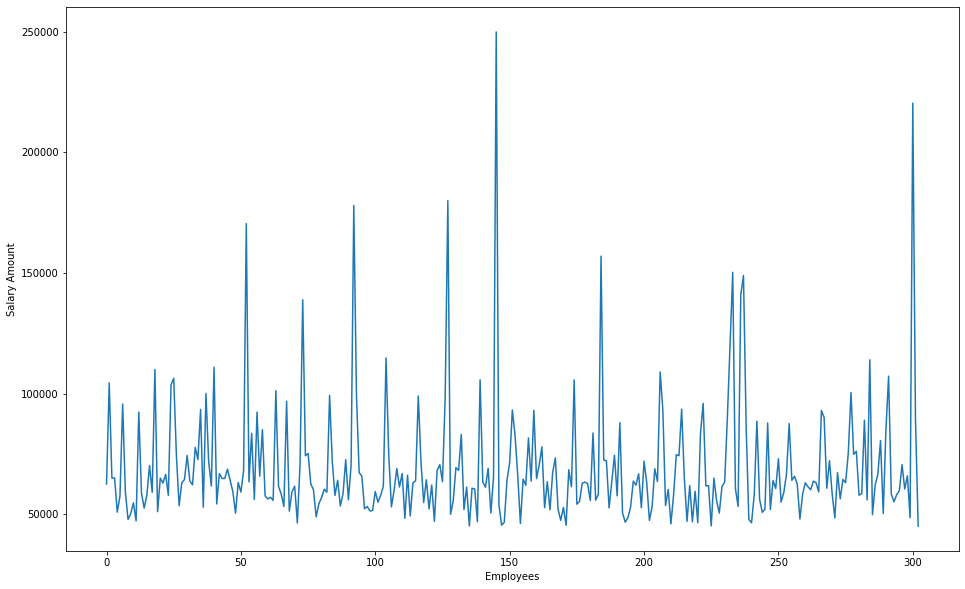

In [24]:
plt.figure(figsize=(16,10))
sns.lineplot(data=hr_data['Salary'])
plt.ylabel("Salary Amount")
plt.xlabel("Employees")

B.5.A. View salaries based on <strong>performance</strong>

In [25]:
# grouped_data
# get only (TermReason,Department) columns 
grouped_data = hr_data.groupby(['Salary','PerformanceScore']).size().reset_index()

# Add Count column to values
grouped_data.columns = ['Salary','PerformanceScore','Count']

# Arrange the values from largest to smallest
grouped_data = grouped_data.sort_values('Count', ascending = False)


px.bar(grouped_data, 
       x = 'PerformanceScore', 
       y = 'Count', 
       color='Salary', 
       title = 'Salary based on Performance')

B.5.A. View salaries based on <strong>Position</strong>


In [26]:
# grouped_data
# get only (TermReason,Position) columns 
grouped_data = hr_data.groupby(['Salary','Position']).size().reset_index()

# Add Count column to values
grouped_data.columns = ['Salary','Position','Count']

# Arrange the values from largest to smallest
grouped_data = grouped_data.sort_values('Count', ascending = False)


px.bar(grouped_data, 
       x = 'Position', 
       y = 'Count', 
       color='Salary', 
       title = 'Salary based on Position')

B.5.A. View salaries based on <strong>Department</strong>


In [27]:
# grouped_data
# get only (TermReason,Department) columns 
grouped_data = hr_data.groupby(['Salary','Department']).size().reset_index()

# Add Count column to values
grouped_data.columns = ['Salary','Department','Count']

# Arrange the values from largest to smallest
grouped_data = grouped_data.sort_values('Count', ascending = False)


px.bar(grouped_data, 
       x = 'Department', 
       y = 'Count', 
       color='Salary', 
       title = 'Salary based on Department')

In [28]:
range_salary = 150000
grouped_data = hr_data[hr_data['Salary'] > 150000]
# grouped_data
# get only (TermReason,Department) columns 
grouped_data = grouped_data.groupby(['Position','PerformanceScore']).size().reset_index()

# Add Count column to values
grouped_data.columns = ['Position','PerformanceScore','Count']

# Arrange the values from largest to smallest
grouped_data = grouped_data.sort_values('Count', ascending = False)


px.bar(grouped_data, 
       x = 'PerformanceScore', 
       y = 'Count', 
       color='Position', 
       title = f'Position based on Performance and salary are more than ${range_salary}')

### Sammary of salaries in organization.
1. <strong>based on Performance:</strong> It is clear that salaries according to performance are not fair, because there are people who have high performance and their salaries are low, and there are people who have low performance and high salaries, they may be managers who have high salaries and poor performance

2. <strong>based on Posotion:</strong> It is clear that the salaries are according to the job title. We note that managers and developers have the highest salaries because their job is major and the most difficult in the organization as their salaries range between <strong> 80,000 and 250,000 $ </strong>.

3. <strong>based on Departments:</strong> 
<ul>
    <li>
        It is clear that the salaries are according to the department. We note that the employees of the IT department have the highest salaries between <strong>50,000 and 220,000 $</strong>.
    </li>
    
    <li>
    The highest paid department is the Excutive Office department, which is <strong>$250,000</strong>
    </li>
</ul>

4. Are employees with salaries over 150,000 high performing? 
    <br> <strong>Yes, IT Manager - Infra</strong>, Need development and him salary are $157000

### B.6 Is there a relationship between age and performance <span id="q6"></span>

In [29]:
# grouped_data
# get only (Age,PerformanceScore) columns 
grouped_data = hr_data.groupby(['Age','PerformanceScore']).size().reset_index()

# Add Count column to values
grouped_data.columns = ['Age','PerformanceScore','Count']

# Arrange the values from largest to smallest
grouped_data = grouped_data.sort_values('Count', ascending = False)


px.bar(grouped_data, 
       x = 'PerformanceScore', 
       y = 'Count', 
       color='Age',
       title='The relationship between Age and Performance')

#### There are no relationship between performance and age

### B.7 Does working on special projects affects performance <span id="q7"></span>

In [30]:
# grouped_data
# get only (SpecialProjectsCount,Department) columns 
grouped_data = hr_data.groupby(['SpecialProjectsCount','Department']).size().reset_index()

# Add Count column to values
grouped_data.columns = ['SpecialProjectsCount','Department','Count']

# Arrange the values from largest to smallest
grouped_data = grouped_data.sort_values('Count', ascending = False)


px.bar(grouped_data, 
       x = 'Department', 
       y = 'Count', 
       color='SpecialProjectsCount',
       title='The relationship between Age and Performance')

#### All the employees of the development department have special projects and most of the employees have high performance. It is possible that the special projects have an impact on performance